[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kintarou/django-starter/blob/master/k_means_clustering.ipynb)

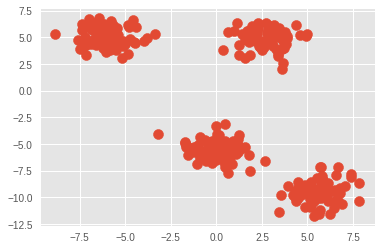

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from sklearn.datasets.samples_generator import make_blobs
X,y_true = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=10)
plt.scatter(X[:,0],X[:,1],s=100);

In [2]:
import cv2
criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
import numpy as np
compactness, labels, centers = cv2.kmeans(X.astype(np.float32),4, None, criteria, 10, flags)
compactness

526.6774351084605

In [0]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(K, n_clusters, rseed=5):
  rng=np.random.RandomState(rseed)
  i=rng.permutation(X.shape[0])[:n_clusters]
  centers=X[i]
  while True:
    labels=pairwise_distances_argmin(X,centers)
    new_centers=np.array([X[labels==i].mean(axis=0) for i in range(n_clusters)])
    if np.all(centers==new_centers):
      break
    centers=new_centers
  return centers, labels  

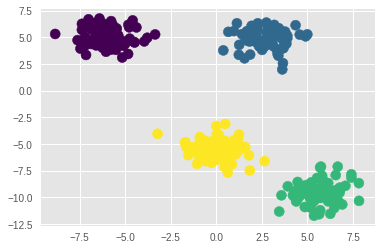

In [4]:
centers, labels=find_clusters(X,4)
plt.scatter(X[:,0],X[:,1],c=labels,s=100,cmap='viridis');

Text(0,0.5,'compactness')

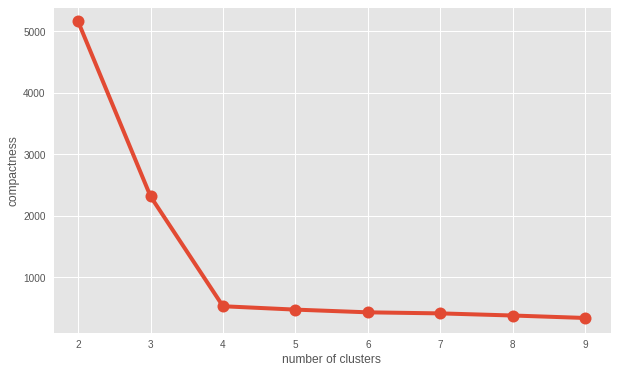

In [5]:
kvals=np.arange(2,10)
compactness=[]
for k in kvals:
  c,_,_=cv2.kmeans(X.astype(np.float32),k,None,criteria,10,flags)
  compactness.append(c)
plt.figure(figsize=(10, 6))
plt.plot(kvals, compactness, 'o-', linewidth=4, markersize=12);
plt.xlabel('number of clusters')
plt.ylabel('compactness')

ValueError: ignored

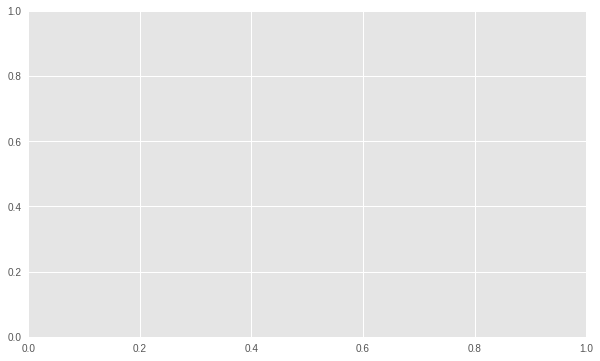

In [8]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=12)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
compactness, labels, centers = cv2.kmeans(X.astype(np.float32), 2, None, criteria, 10, flags)
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=100);

/usr/local/lib/python3.6/dist-packages/scipy/sparse/csgraph/_laplacian.py:72: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, int)


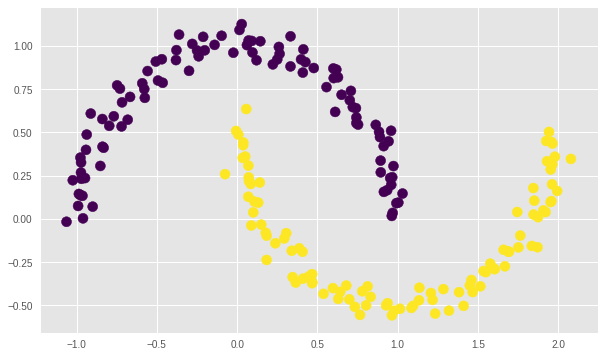

In [10]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=100, cmap='viridis');

In [27]:
from google.colab import files
uploaded = files.upload()

Saving lena.png to lena.png


In [0]:

import cv2
import numpy as np
lena = cv2.imread('lena.png', cv2.IMREAD_COLOR)

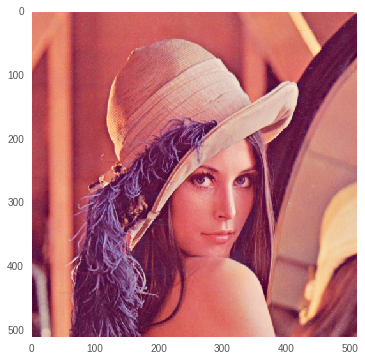

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.rc('axes', **{'grid': False})
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(lena, cv2.COLOR_BGR2RGB))

In [30]:

lena.shape

(512, 512, 3)